In [0]:
import torchvision
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio

Merubah folder gambar menjadi dataset

In [0]:
PATH = Path("drive/My Drive/Colab Notebooks/kaggle/working/data/")
tfms = get_transforms(do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.05,
                      max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2))]) #data preprocessing

data = ImageDataBunch.from_folder(PATH,train='train',test='valid',
                                  ds_tfms=tfms
                                  ,size=128,bs=64).normalize(imagenet_stats) #untuk mengubah menjadi dataset

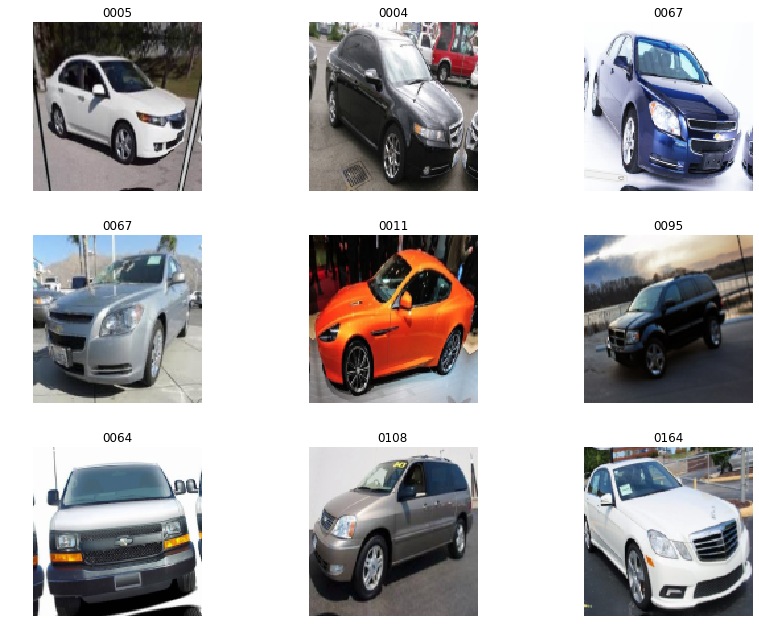

In [0]:
data.show_batch(rows=3, figsize=(12,9)) #jadilah seperti ini

In [0]:
# class names and number of classes
# print(data.classes)
len(data.classes),data.c

(196, 196)

In [0]:
!pip install pretrainedmodels
import pretrainedmodels

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=9d9adaeb17fe0ea6b1743d28fb3146685538190e8c934f3d3003da6f89ffc18a
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=ecdc82c337beba6346a6c077e9b06f8d9966557680b4b20b0502ea2efc1b52c8
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch


In [0]:
from torch import nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=2.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [0]:
def resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
    return nn.Sequential(*list(model.children())) #menggunakan resnet50

Model data learn CNN ResNet50

In [0]:
learn = cnn_learner(data, resnext50_32x4d, pretrained=True, cut=-2,
                    split_on=lambda m: (m[0][3], m[1]), 
                    metrics=[accuracy]) #merupakan model learning menggunakan resnet, strukturnya bisa lihat diinernet
learn.loss_fn = FocalLoss()

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /root/.cache/torch/checkpoints/se_resnext50_32x4d-a260b3a4.pth
100%|██████████| 110559176/110559176 [05:11<00:00, 355347.88it/s]


Visualisasi learning rate, yang direkomendasikan yang ada titik merah

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.20E-02


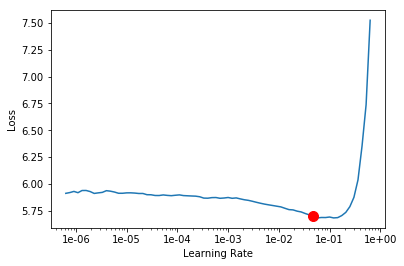

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Proses training dan validasi, baru 1 epoch

In [0]:
learn.fit_one_cycle(3, max_lr=slice(2e-2), wd=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,4.738564,4.169214,0.117827,39:44


In [0]:
# Hasil diatas masih belum bagus
# karena keterbatasan waktu, jadi epochnya di sedikitin
# epochnya harusnya ditambah lagi biar bagus
# tadi running dari subuh sampe jam 10 cuma dapet 1 epoch trs tiba2 selesai, pdhal di set nya 3 epoch :(
# Hal yang perlu diimprove adalah ubah learning ratenya
# Juga dapat diubah lagi pada preprocessing data, yakni diubah2 ukuran gambarnya

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
